# Coding Assignment : Traffic flow



This time we will try to describe the general behavior of the flow of traffic on a one-lane highway.

Our code was split two parts, each part being used with different initial conditions.

The equation of the traffic flow, as it was given to us is :

\begin{equation}\frac{\partial \rho}{\partial t} +  \frac{\partial F}{\partial x} = 0\end{equation}

But we will change it to a form only dependent on $\rho$, by derivating (spatially) the F function :

\begin{equation}\frac{\partial F}{\partial x} = \frac{\partial [V_{max} \rho \left(1 - \frac{\rho}{\rho_{max}} \right)] }{\partial x} = f(\rho)\frac{\partial \rho}{\partial x}\end{equation}      with    \begin{equation} f(\rho) = V_{max}-2\rho\frac{V_{max}}{\rho_{max}} \end{equation}

Thus, we obtain a non linear 1D diffusion equation, but with a function of $\rho$ instead of simply $\rho$ :

\begin{equation}\frac{\partial \rho}{\partial t} + f(\rho)\frac{\partial \rho}{\partial x}=0\end{equation}

Furthermore, the discretized equation gives ( forward difference in time and backwards difference in space) :

\begin{equation}\frac{\rho_i^{n+1}-\rho_i^n}{\Delta t} + f(\rho_i^n) \frac{\rho_i^n-\rho_{i-1}^n}{\Delta x} = 0\end{equation}

We can obtain an equation that can be used to advance in time, solving for the only unknown term 

\begin{equation}\rho_i^{n+1}= \rho_i^n - f(\rho_i^n) \frac{\Delta t}{\Delta x} (\rho_i^n - \rho_{i-1}^n)\end{equation}

## Simulation results : Part A

* **Importing libraries**

In [29]:
import numpy                    
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

* **Initial conditions**

In [30]:
Vmax=80   # Maximum speed the cars can reach, in Km/h
L=11      # Stretch of road we're studying, in Km
umax=250  # Rho max, in cars per Km (to simplify, we used u=rho)

def f(u) :                     # The function we defined above
    return Vmax-2*Vmax*u/umax  

# These data can be changed to obtain the results we are looking for
nx=51
dx=L/(nx-1)
nt=50
dt=0.001  # in hours

* **Given initial conditions for traffic density**

In [31]:
x=numpy.linspace(0,L,nx)
u=numpy.ones(nx)*10
u[10:20]=50
print (u)  

[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]


In [32]:
for n in range (1, nt):
    un=u.copy()
    u[1:]=un[1:]-f(un[1:])*dt/dx*(un[1:]-un[0:-1]) # Evolution of rho in time
    u[0]=10       # Boundary condition
print (u)    
print (numpy.mean(u))

[ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.00000016  10.0000043
  10.00005634  10.00048665  10.00311989  10.01585909  10.06668915
  10.23887634  10.74328217  12.02839905  14.8390052   19.92367123
  27.14328554  34.88007703  41.12743475  44.97966915  46.63869633
  46.66187568  45.52575715  43.5565586   40.98097353  37.97499695
  34.68976044  31.26263079  27.82183921  24.48810405  21.37361778
  18.57772777  16.17911676  14.22593832  12.72751097  11.65228445
  10.93513777  10.49268919  10.24100521  10.10924727  10.04582543
  10.01776592  10.00635816  10.00209775  10.00063705]
18.6701582075


* **How it looks**

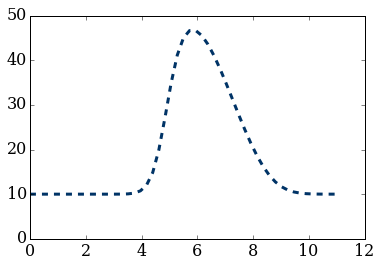

In [33]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,50);



## Simulation results : Part B

This time we will use different initial and boundary conditions.

* **New intial conditions**

In [34]:
Vmax=136 # This one was changed
L=11
umax=250

def f(u) :
    return Vmax-2*Vmax*u/umax

nx=51
dx=L/(nx-1)
nt=50
dt=0.001

x=numpy.linspace(0,L,nx)
u=numpy.ones(nx)*20   # This one was changed as well
u[10:20]=50
print (u)

[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.]


In [35]:
for n in range (1, nt):
    un=u.copy()
    u[1:]=un[1:]-f(un[1:])*dt/dx*(un[1:]-un[0:-1])
    u[0]=20     # New boundary condition
print (u)    
print (numpy.mean(u))

[ 20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.          20.
  20.00000001  20.00000005  20.00000044  20.00000313  20.00001901
  20.00010078  20.00047277  20.00198426  20.00751956  20.02593504
  20.08196608  20.23859907  20.64103298  21.58324383  23.54490031
  27.01631259  31.94862071  37.34373055  41.85550864  44.76340842
  46.11276272  46.27756144  45.62660692  44.42422378  42.84252989
  40.99551313  38.96547379  36.81887735  34.61500937  32.41058454
  30.26203821  28.22605544  26.3581788   24.70911446  23.31875941
  22.20908551  21.3784552 ]
26.5608664355


* **How it looks**

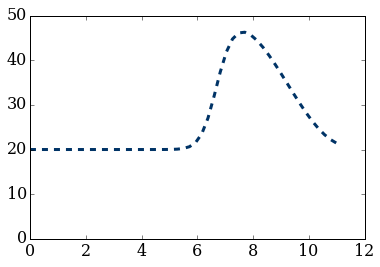

In [36]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,50);

Thanks for your attention, we'll be back !